Raíces encontradas: [2.769292354240029, 2.769292354251341, 2.769292662905941]


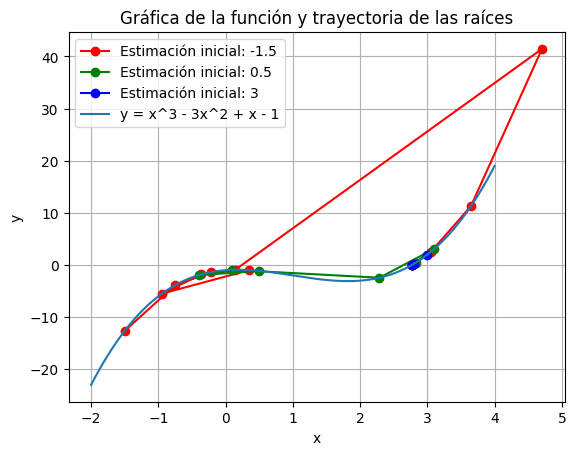

In [16]:
# prompt: ▸Dibujar la ecuación y x = 𝑥^3 − 3𝑥^2 + 𝑥 − 1
# ▸Encontrar la o las raíces usando el método de Newton con Scipy
# ▸Retornar las estimaciones visitadas por el algoritmo
# - Usando el parámetro args=() u otro método
# ▸Dibujar la trayectoria de las raíces
# - Pruebe 3 estimaciones iniciales diferentes
# ▸¿Cómo ejecutar el código y evitar que dé error para toda estimación?
# - Sin ejecutar try except

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

# Definir la función y su derivada
def f(x: float, points: list[float] = [], show: bool = False):
    y = x**3 - 3 * x**2 + x - 1
    points.append((x, y))
    if show:
        print(f"f({x}) = {y}")
    return y

def df(x):
  return 3*x**2 - 6*x + 1

# Rango de x para la gráfica
x = np.linspace(-2, 4, 400)
y = f(x)

# Encontrar las raíces usando el método de Newton con Scipy
estimaciones_iniciales = [-1.5, 0.5, 3]
colores = ['r', 'g', 'b']
raices = []
estimaciones_todas = []


for i, estimacion_inicial in enumerate(estimaciones_iniciales):
  def newton_con_historial(f, df, x0, args=()):
    """
    Función que encuentra la raíz de una función usando el método de Newton
    y retorna la lista de estimaciones visitadas.

    """
    x = x0
    estimaciones = [x]
    for _ in range(100):  # límite de iteraciones
      x_nuevo = x - f(x) / df(x)
      if abs(x_nuevo - x) < 1e-6:  # criterio de convergencia
        break
      x = x_nuevo
      estimaciones.append(x)
    return x, estimaciones


  raiz, estimaciones = newton_con_historial(f, df, estimacion_inicial)
  raices.append(raiz)
  estimaciones_todas.append(estimaciones)

  # Dibujar la trayectoria de la raíz
  x_estimaciones = [est for est in estimaciones]
  y_estimaciones = [f(est) for est in estimaciones]
  plt.plot(x_estimaciones, y_estimaciones, marker='o', linestyle='-', color=colores[i], label=f'Estimación inicial: {estimacion_inicial}')



# Dibujar la gráfica de la función
plt.plot(x, y, label='y = x^3 - 3x^2 + x - 1')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfica de la función y trayectoria de las raíces')
plt.grid(True)
plt.legend()

# Mostrar las raíces encontradas
print("Raíces encontradas:", raices)

# Mostrar las estimaciones visitadas
#print("Estimaciones visitadas:", estimaciones_todas)

plt.show()

In [17]:
from scipy.optimize import newton

x0 = 100
x_r = newton(f, x0)
x_r

2.7692923542386314

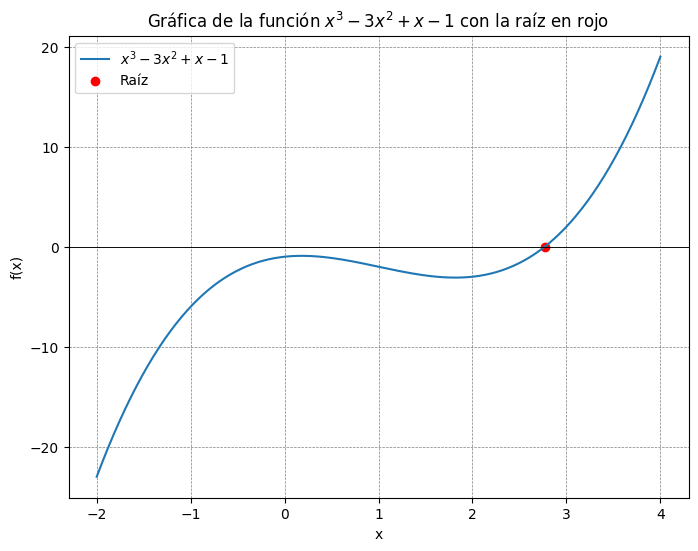

In [18]:
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='$x^3 - 3x^2 + x - 1$')
plt.axhline(0, color='black', linewidth=0.5)
plt.axhline(0, color='black', linewidth=0.5)
plt.scatter(x_r, f(x_r), color='red', label='Raíz')
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de la función $x^3 - 3x^2 + x - 1$ con la raíz en rojo')
plt.legend()
plt.show()

In [19]:
# prompt: Recuperar las raices exploradas con el metodo de newton

def obtener_raices_exploradas(estimaciones_todas):
  raices_exploradas = []
  for estimaciones in estimaciones_todas:
    raices_exploradas.append(estimaciones)
  return raices_exploradas

# Llamar a la función para obtener las raíces exploradas
raices_exploradas = obtener_raices_exploradas(estimaciones_todas)

# Imprimir las raíces exploradas
print("Raíces exploradas para cada estimación inicial:")
for i, raices in enumerate(raices_exploradas):
    print(f"Estimación inicial {estimaciones_iniciales[i]}: {raices}")

Raíces exploradas para cada estimación inicial:
Estimación inicial -1.5: [-1.5, -0.746268656716418, -0.21011384847088066, 0.3547678501127215, -0.9476652550563932, -0.36207615694945916, 0.14352273551430805, 4.705057631140077, 3.647160919849052, 3.055460342130331, 2.8144028271996024, 2.7706870525894294, 2.7692937490838414, 2.769292354240029]
Estimación inicial 0.5: [0.5, -0.4, 0.10103092783505152, 2.2887793276654564, 3.105767299013572, 2.8291999504602514, 2.7717158120621077, 2.76929656115579, 2.769292354251341]
Estimación inicial 3: [3, 2.8, 2.7699481865284974, 2.769292662905941]
